In [13]:
import numpy as np 

from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

In [14]:
from skimage.io import imread
shape = imread('shape_noise.png')

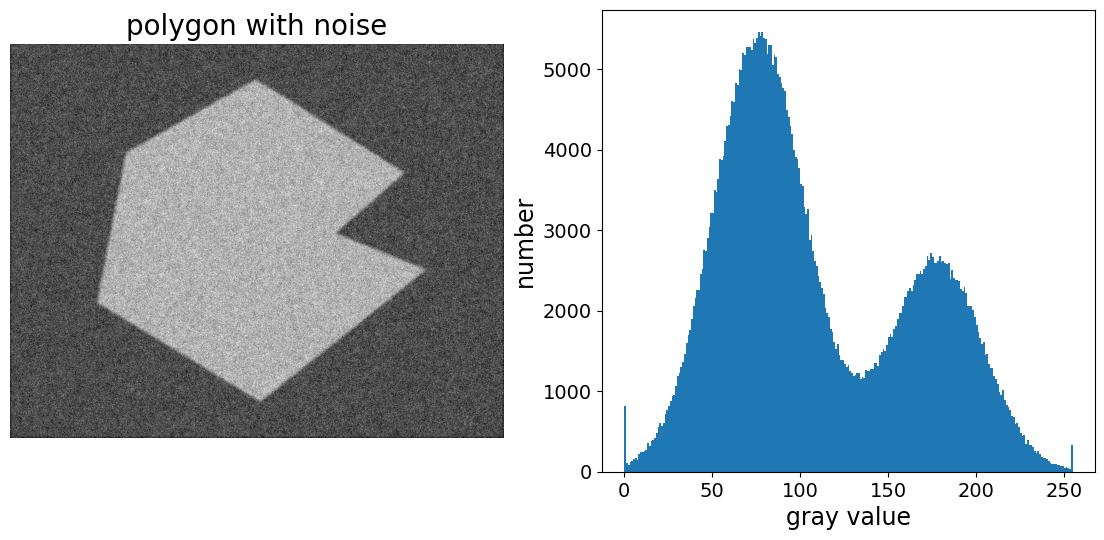

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.imshow(shape, cmap=plt.cm.gray)
plt.axis('off')
plt.title('polygon with noise', fontsize=20)

plt.subplot(122)
plt.hist(shape.flatten(), bins=255)
plt.ylabel('number')
plt.xlabel('gray value')

plt.show()

In [16]:
# binarization with a given threshold
bina_140 = (shape >140)

# binarization with Otsu's threshold
from skimage import filters
otsu = filters.threshold_otsu(shape)
bina_otsu = (shape > otsu)

print('Otsu threshold is', otsu)

Otsu threshold is 125


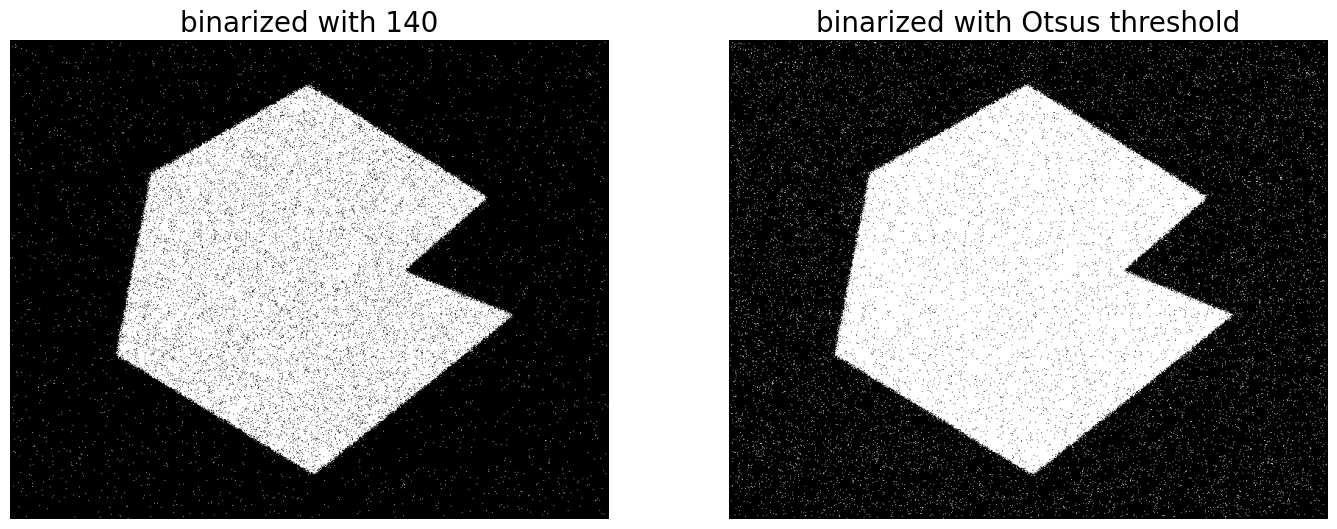

In [17]:
plt.figure(figsize=(17,8))

plt.subplot(121)
plt.imshow(bina_140, cmap=plt.cm.gray)
plt.axis('off')
plt.title('binarized with 140', fontsize=20)

plt.subplot(122)
plt.imshow(bina_otsu, cmap=plt.cm.gray)
plt.axis('off')
plt.title('binarized with Otsus threshold', fontsize=20)

plt.show()

### we can handle this problem with a lowpass filter
another option are morphological filters (still to be covered)

In [18]:
# decreasing the noise by lowpass filtering
from skimage import filters
shape_lp  = filters.gaussian(shape, sigma=3)

In [19]:
otsu = filters.threshold_otsu(shape_lp)
print('Otsu threshold after lowpass: {:.2}'.format(otsu) )

bina_lp_otsu = (shape_lp > otsu)

Otsu threshold after lowpass: 0.49


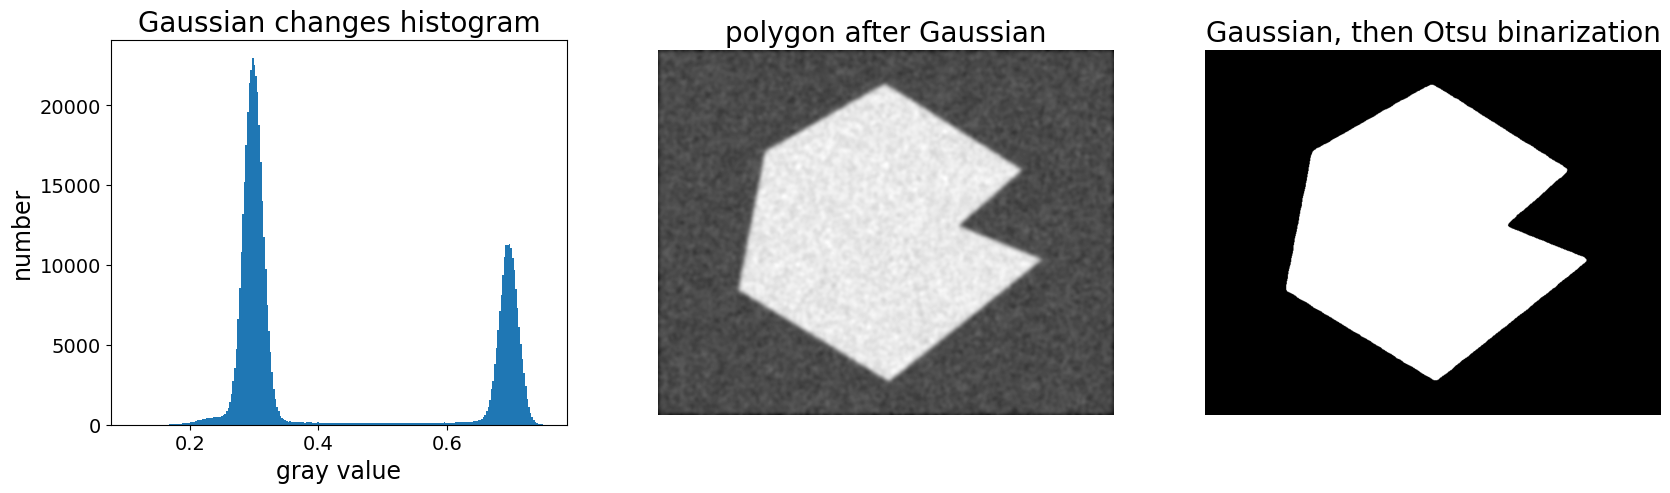

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(shape_lp.flatten(), bins=255)
plt.ylabel('number')
plt.xlabel('gray value')  
plt.title('Gaussian changes histogram', fontsize=20)

plt.subplot(132)
plt.imshow(shape_lp, cmap=plt.cm.gray)
plt.axis('off')
plt.title('polygon after Gaussian', fontsize=20)

plt.subplot(133)
plt.imshow(bina_lp_otsu, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian, then Otsu binarization', fontsize=20)

plt.show()